# 图像的浮雕效果
 计算相邻像素的差值，填充到当前位置


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# 封装显示函数
def imshow(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img,cmap="gray")

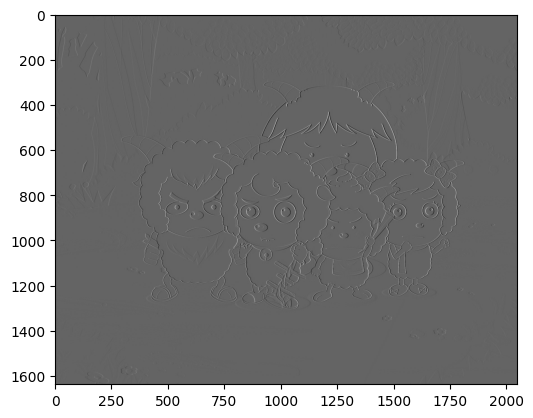

In [2]:
img = cv.imread("img/xh.jpg")
# 彩图转灰度图
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# 创建画布
dst = np.zeros_like(gray)
# 获取图片信息
height,width = gray.shape[0:2]
# 向画布中填充梯度信息
for row in range(height):
    for col in range(width - 1):
        color0 = gray[row,col]
        color1 = gray[row,col+1]
        # 计算相邻像素点的差异
        value = int(color0) - int(color1) + 100
        if value < 0:
            value = 0
        if value > 255:
            value = 255
        # 将差值填充到画布中去
        dst[row,col] = value
# 显示图像
imshow(dst)

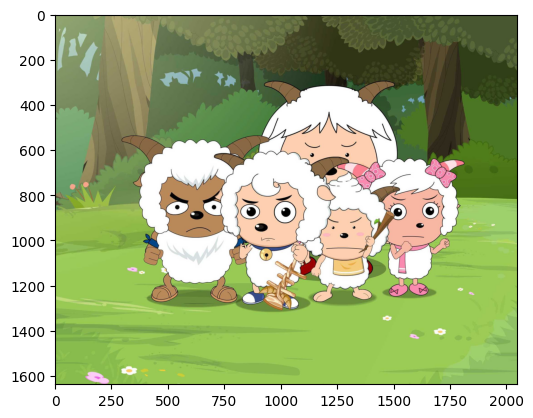

In [3]:
imshow(img)

# 绘制图像
 - 1.绘制直线
 - 2.绘制矩形
 - 3.绘制圆形
 - 4.绘制文本

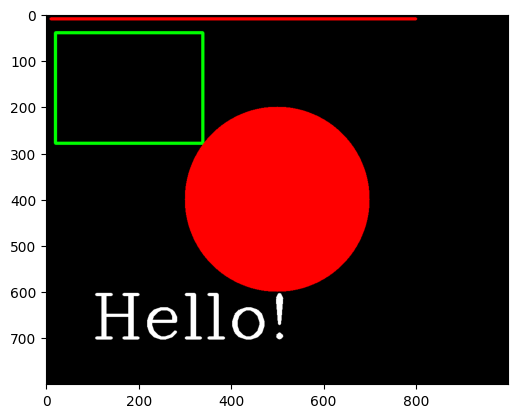

In [4]:
# 绘制空白图像
img = np.zeros((800,1000,3),np.uint8)
# 绘制直线
dst = cv.line(img,(10,10),(800,10),(0,0,255),5)
# 绘制矩形
dst = cv.rectangle(dst,(20,40,300+20,200+40),(0,255,0),5)
# 绘制圆形
dst = cv.circle(dst,(500,400),200,(0,0,255),-1)
# 绘制文本
dst = cv.putText(dst,"Hello!",(100,700),cv.FONT_HERSHEY_COMPLEX,4.5,(255,255,255),5)
imshow(dst)

# 图像亮度增强

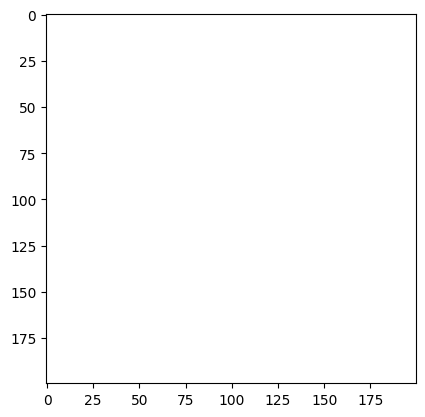

In [5]:
# 创建空白图像
img = np.ones((200,200,1),np.uint8)
img = img*255
imshow(img)

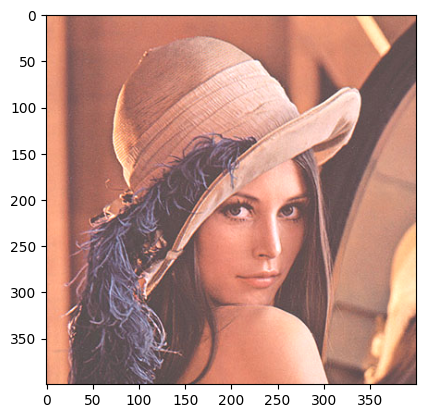

In [6]:
img = cv.imread("img/lena.jpg")
# 得到图片数据
height,width = img.shape[0:2]
# 拷贝原图
img1 = img.copy()
for row in range(height):
    for col in range(width):
        b,g,r = img1[row,col]
        b = b + 50
        g = g + 50 
        r = r + 50
        if b >= 255: b = 255
        if g >= 255: g = 255
        if r >= 255: r = 255
        # 将颜色填充回去
        img1[row,col] = b,g,r
imshow(img1)

# 图像直方图
 - 图像的直方图用于分析图像，统计每种灰度值在图像中出现的次数

## 灰度直方图

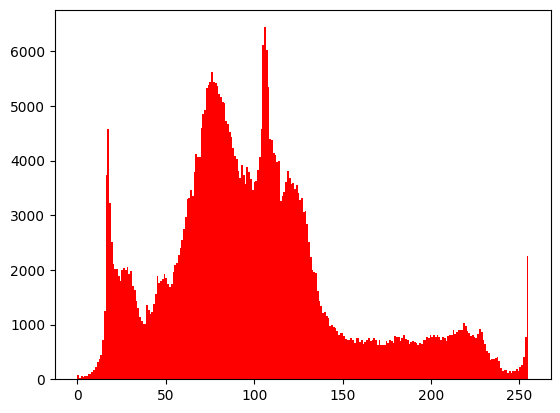

In [7]:
itheima = cv.imread("img/itheima.jpg",cv.IMREAD_GRAYSCALE)
plt.hist(itheima.ravel(),color="red",bins=256)
plt.show()

## 灰度直方图均衡化

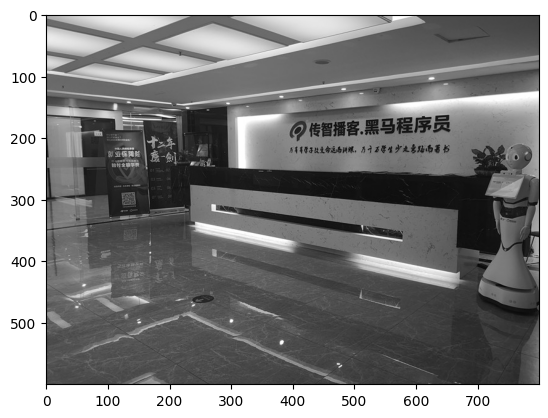

In [8]:
imshow(itheima)

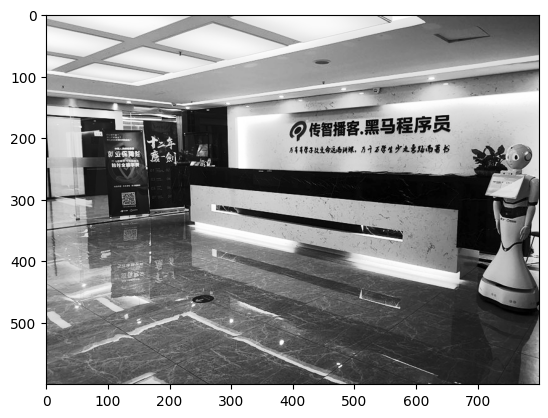

In [9]:
# 直方图均衡化
dst = cv.equalizeHist(itheima)
imshow(dst)

## 彩色图像直方图
 - 彩色图像其实是由BGR三个通道组成，需要分别对每个通道进行分析
 - 如果需要均衡化同样是对每个通道进行均衡化

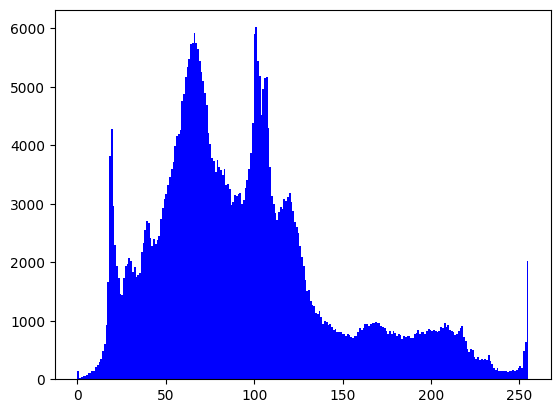

In [10]:
itheima = cv.imread("img/itheima.jpg")
# 将三个通道拆分出来
chanels = cv.split(itheima)
plt.hist(chanels[0].ravel(),color="blue",bins = 256)
plt.show()

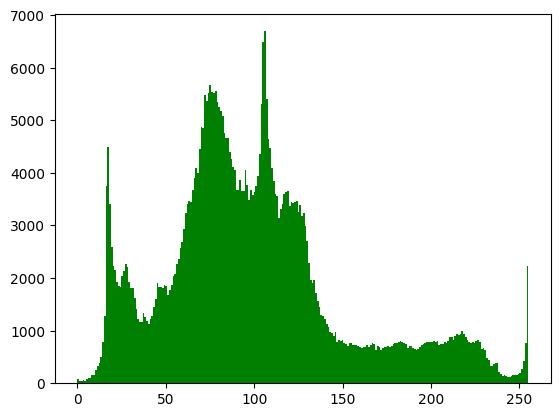

In [11]:
plt.hist(chanels[1].ravel(),color="green",bins = 256)
plt.show()

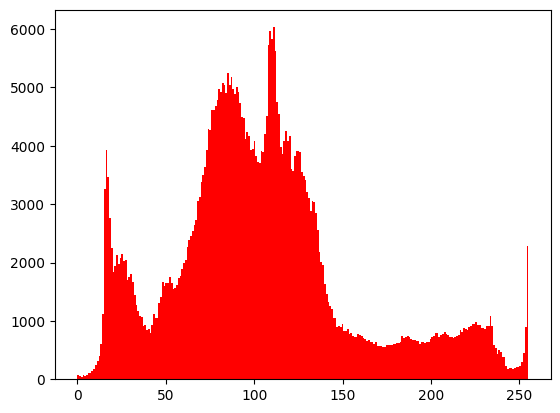

In [12]:
plt.hist(chanels[2].ravel(),color="red",bins = 256)
plt.show()

## 彩色图像均衡化

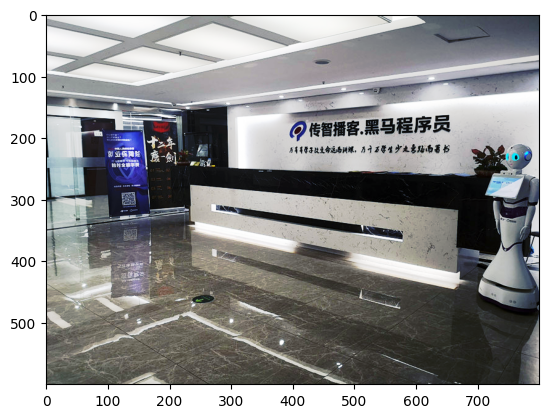

In [13]:
chanel0 = cv.equalizeHist(chanels[0])
chanel1 = cv.equalizeHist(chanels[1])
chanel2 = cv.equalizeHist(chanels[2])
# split 分隔
# merge 合并
dst = cv.merge([chanel0,chanel1,chanel2])
imshow(dst)

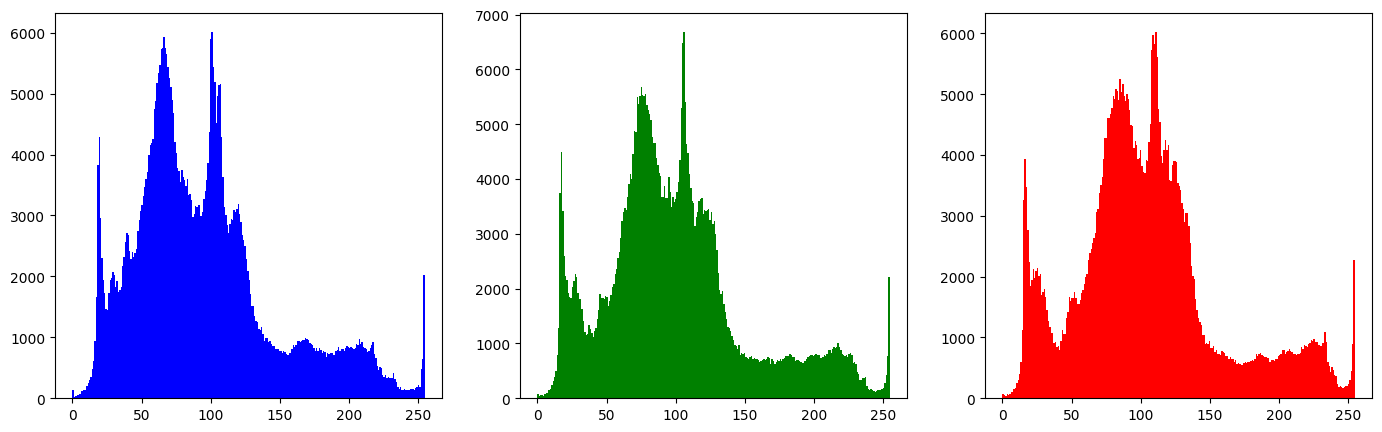

In [14]:
plt.subplots(nrows=1,ncols=3,figsize=(17,5))

plt.subplot(1,3,1)
plt.hist(chanels[0].ravel(),color="blue",bins=256)

plt.subplot(1,3,2)
plt.hist(chanels[1].ravel(),color="green",bins=256)

plt.subplot(1,3,3)
plt.hist(chanels[2].ravel(),color="red",bins=256)
plt.show()

# HSV判断白天夜晚
 HSV中的V可以表示亮度可以来判断白天夜晚

In [15]:
day = cv.imread("img/day.jpg")
night = cv.imread("img/night.jpg")
day_hsv = cv.cvtColor(day,cv.COLOR_BGR2HSV)
night_hsv = cv.cvtColor(night,cv.COLOR_BGR2HSV)

In [19]:
# 计算图像的平均明度
def average_brightness(img):
    img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    # 分割图像
    v_channel = cv.split
    # 求和
    sum_result = np.sum(v_channel)
    # 总共有多少个像素点
    height,width = v_channel.shape[0:2]
    return sum_result/(height*width)

In [18]:
day_v = average_brightness(day)
night_v = average_brightness(night)
day_v

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

# 分割网球

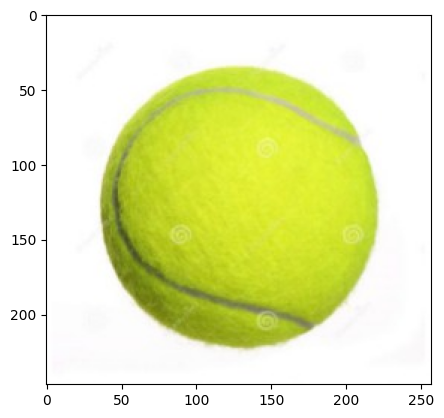

In [20]:
img = cv.imread("img/tenis1.jpg")
imshow(img)

## 颜色过滤
 过滤完成后会返回一个mask蒙版图像
 1 将图像转成hsv
 2 选定范围
 3 inRange

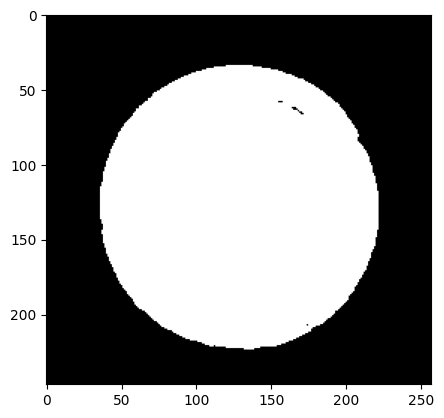

In [21]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# 选定范围

lowerb = (30,43,46)
upperb = (60,255,255)
# 蒙版
mask = cv.inRange(hsv,lowerb,upperb)
imshow(mask)

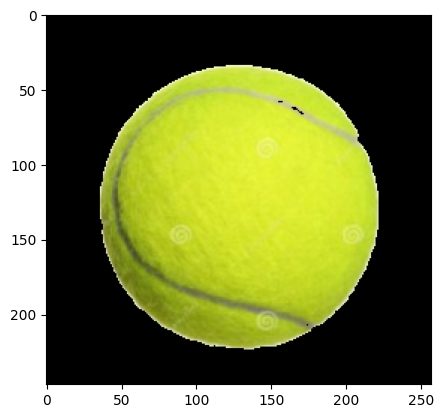

In [22]:
# 从原图中抠出网球
# 把蒙版中==0的位置在img中全部为0
img[mask == 0] = (0,0,0)
imshow(img)

# 图像的二值化

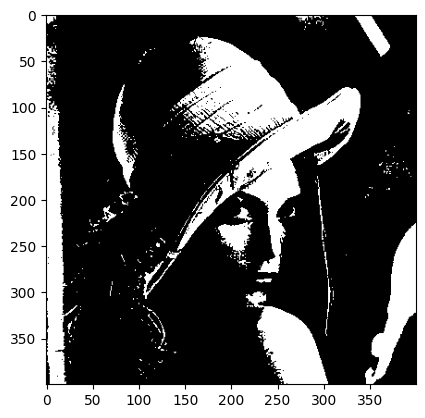

In [23]:
import cv2 as cv
img = cv.imread("img/lena.jpg",cv.IMREAD_GRAYSCALE)
thresh,binary = cv.threshold(img,128,255,cv.THRESH_BINARY)
plt.imshow(binary,cmap="gray")

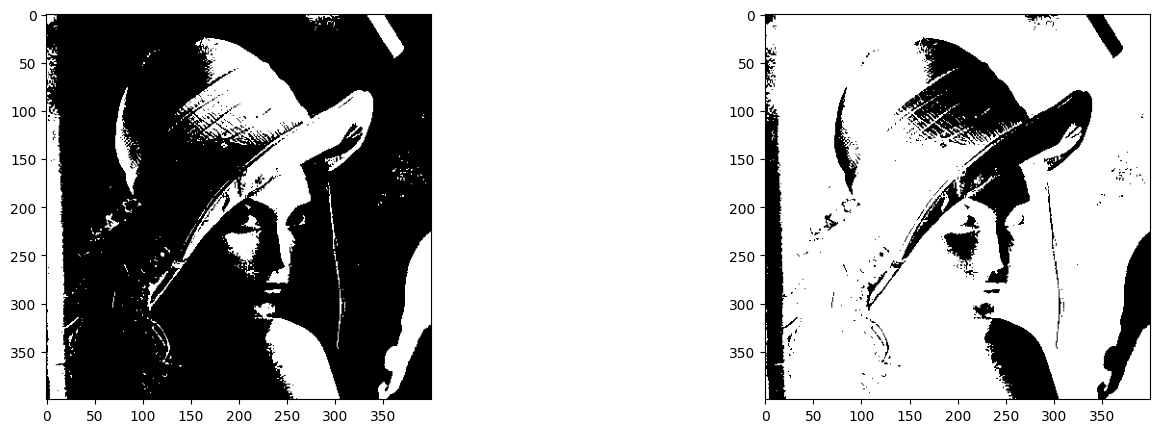

In [24]:
plt.figure(figsize=(17,5))
thresh,binary1 = cv.threshold(img,128,255,cv.THRESH_BINARY)
thresh,binary2 = cv.threshold(img,128,255,cv.THRESH_BINARY_INV)
plt.subplot(1,2,1)
plt.imshow(binary1,cmap="gray")

plt.subplot(1,2,2)
plt.imshow(binary2,cmap="gray")
plt.show()

## 显示车牌的位置

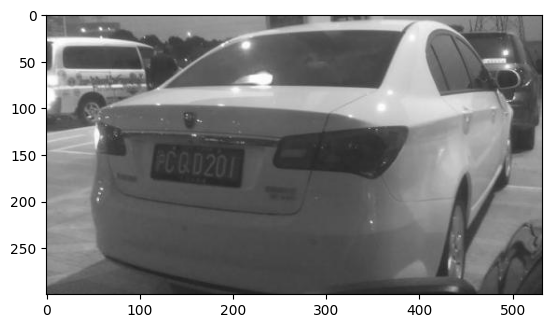

In [25]:
img = cv.imread("img/car.jpg",cv.IMREAD_GRAYSCALE)
imshow(img)

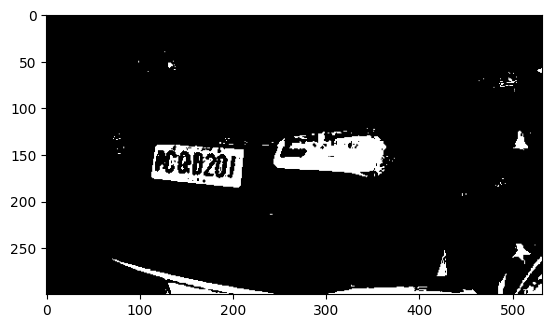

In [26]:
thresh, binary = cv.threshold(img,53,255,cv.THRESH_BINARY_INV)
plt.imshow(binary,cmap="gray")

## 自适应阈值

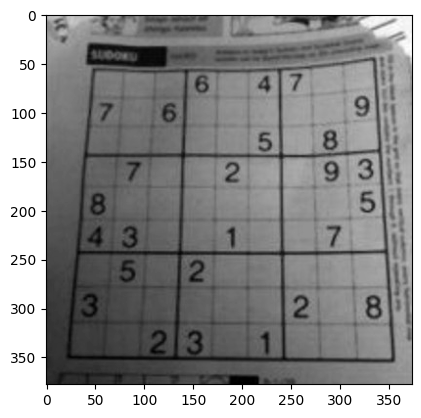

In [27]:
img = cv.imread("img/thresh1.jpg",cv.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")

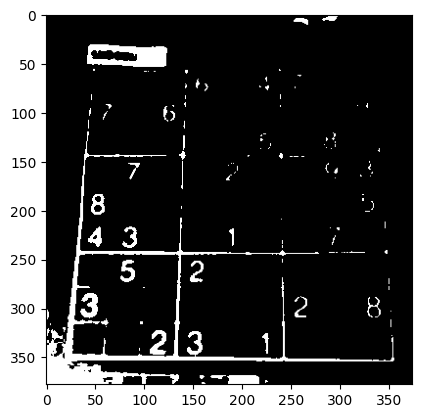

In [28]:
thresh, binary = cv.threshold(img,51,255,cv.THRESH_BINARY_INV)
plt.imshow(binary,cmap="gray")

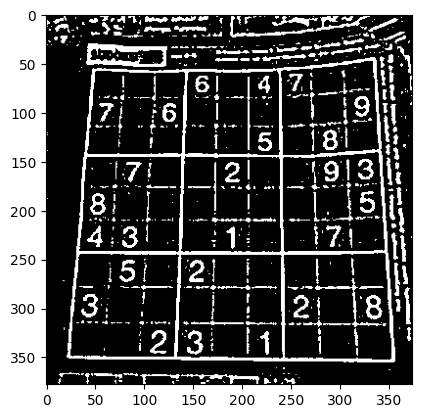

In [29]:
# 使用自适应阈值
dst = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV,11,5)
plt.imshow(dst,cmap="gray")

## OTSU算法

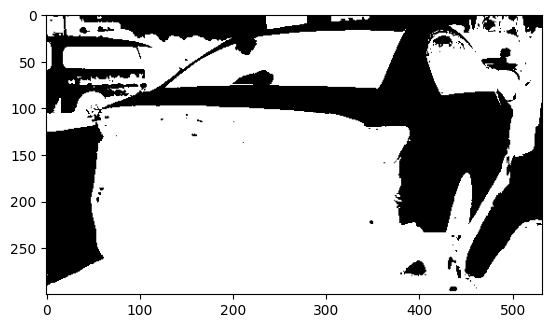

In [34]:
img = cv.imread("img/car.jpg",cv.IMREAD_GRAYSCALE)
thresh,binary = cv.threshold(img,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
plt.imshow(binary,cmap="gray")

## 三角阈值

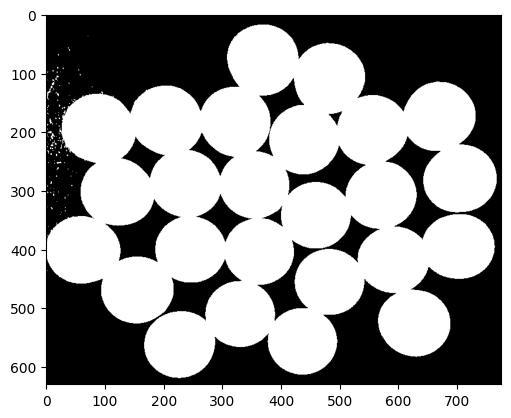

In [43]:
img = cv.imread("img/lingjian.png")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh, binary = cv.threshold(gray,0,255,cv.THRESH_BINARY | cv.THRESH_TRIANGLE)
plt.imshow(binary,cmap="gray")